In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
from sqlalchemy import create_engine, MetaData
from sqlalchemy.ext.automap import automap_base
from datetime import datetime, timedelta

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///C:/Users/User/OneDrive/Desktop/sqlalchemy-challenge/Resources/hawaii.sqlite")


In [5]:
# Create an engine to connect the database
engine = create_engine("sqlite:///C:/Users/User/OneDrive/Desktop/sqlalchemy-challenge/Resources/hawaii.sqlite")

# Reflect the existing database into a new model
Base = automap_base()

# Reflect the tables
Base.prepare(engine, reflect=True)


In [6]:
# View all of the classes that automap found

# View all of the classes that automap found
classes = list(Base.classes.keys())
print(classes)


['measurement', 'station']


In [7]:
# Save references to each table
# Save references to each table in variables
station_table = Base.classes.station
measurement_table = Base.classes.measurement

# dictionary
table_references = {
    "station": Base.classes.station,
    "measurement": Base.classes.measurement
}


In [8]:
# Create our session (link) from Python to the DB

session = Session(engine)


# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.

most_recent_date = session.query(func.max(measurement_table.date)).scalar()

print("The most recent date is:", most_recent_date)


The most recent date is: 2017-08-23


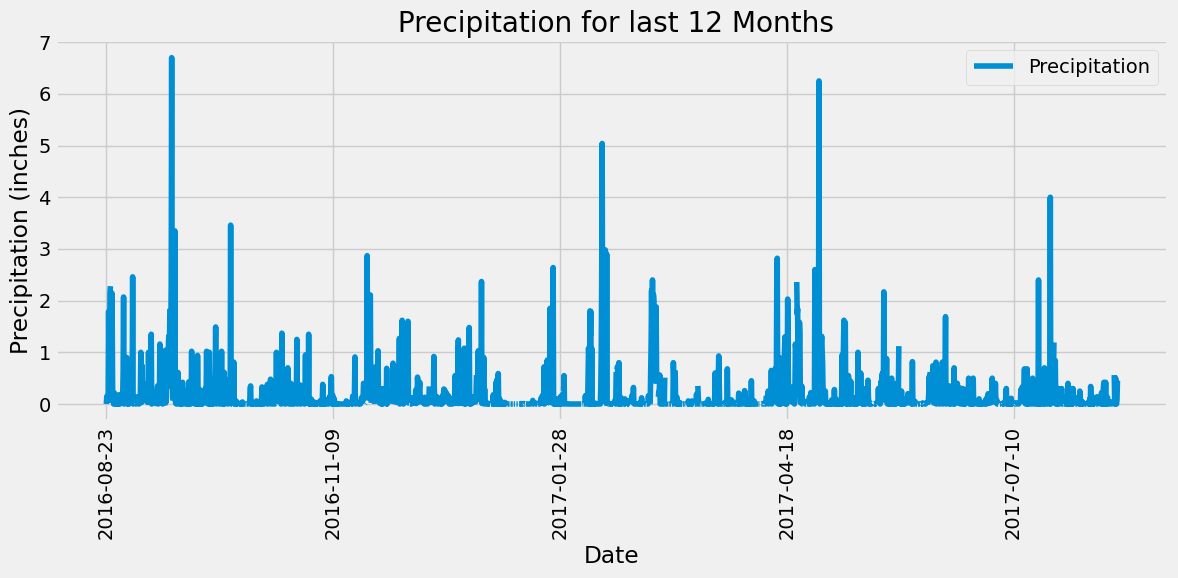

In [10]:


# Calculate the most, maximum value (in scalar), recent date in the measurement table
most_recent_date_string = session.query(func.max(measurement_table.date)).scalar()
# Convert the date from a string to a datetime object
most_recent_date = datetime.strptime(most_recent_date_string, '%Y-%m-%d')
# Calculate a year ago from the most recent
year_ago = most_recent_date - timedelta(days=366)

# Query to retrieve the data and precipitation for the last 12 months, filter twice giving two conditions, then sort by 
# descending order
precipitation_data = session.query(measurement_table.date, measurement_table.prcp) \
    .filter(measurement_table.date >= year_ago) \
    .filter(measurement_table.date <= most_recent_date) \
    .order_by(measurement_table.date) \
    .all()

# Results in a Pandas DataFrame with specified column names
precipitation_df = pd.DataFrame(precipitation_data, columns=['Date', 'Precipitation'])

# Sort the DataFrame
precipitation_df.set_index('Date', inplace=True)

# Use DataFrame, plot as specified requirements
precipitation_df.plot(y='Precipitation', figsize=(12, 6))
plt.title(" Precipitation for last 12 Months")
plt.xlabel("Date")
plt.ylabel("Precipitation (inches)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
# .describe() method for descriptive statistics
summary_statistics = precipitation_df.describe()

summary_statistics


,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
total_stations = session.query(func.count(station_table.station)).all()

print(total_stations)


[(9,)]


In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.


# Query that the most active stations with counts in descending order 
active_stations = session.query(
    measurement_table.station,
    func.count(measurement_table.station).label('station_count')
).group_by(measurement_table.station).order_by(func.count(measurement_table.station).desc()).all()

# Print the list of most active stations with counts
for station, count in active_stations:
    print(f" {station},  {count}")




 USC00519281,  2772
 USC00519397,  2724
 USC00513117,  2709
 USC00519523,  2669
 USC00516128,  2612
 USC00514830,  2202
 USC00511918,  1979
 USC00517948,  1372
 USC00518838,  511


In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
from sqlalchemy import func

# Get the most active station ID 
most_active_station_id = 'USC00519281'

# Calculate the lowest, highest, and average temperature for the most active station
temperature_stats = session.query(
    func.min(measurement_table.tobs).label("min_temp"),
    func.max(measurement_table.tobs).label("max_temp"),
    func.avg(measurement_table.tobs).label("avg_temp")
).filter(measurement_table.station == most_active_station_id).all()

# Extract the values and format the result as a list of tuples
result = [(row.min_temp, row.max_temp, row.avg_temp) for row in temperature_stats]

# Print the temperature statistics
print(result)

print(" ")
# Print the temperature statistics with description
for row in temperature_stats:
    print(f"Most Active Station: {most_active_station_id}")
    print(f"Lowest Temperature: {row.min_temp} °F")
    print(f"Highest Temperature: {row.max_temp} °F")
    print(f"Average Temperature: {row.avg_temp} °F")


[(54.0, 85.0, 71.66378066378067)]
 
Most Active Station: USC00519281
Lowest Temperature: 54.0 °F
Highest Temperature: 85.0 °F
Average Temperature: 71.66378066378067 °F


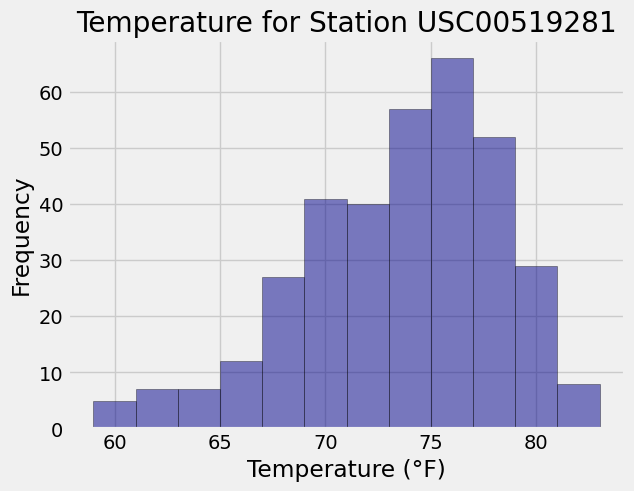

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Choose most active station
most_active_station_id = 'USC00519281'

# Calculate the most recent date in the dataset
most_recent_date_string = session.query(func.max(measurement_table.date)).scalar()
most_recent_date = datetime.strptime(most_recent_date_string, '%Y-%m-%d')

# Calculate date year ago from the most recent date
one_year_ago = most_recent_date - timedelta(days=365)

# Retrieve the temperature for the last 12 months for the most active station by filtering
temperature_data = session.query(measurement_table.tobs) \
    .filter(measurement_table.station == most_active_station_id) \
    .filter(measurement_table.date >= one_year_ago) \
    .filter(measurement_table.date <= most_recent_date) \
    .all()

# Display the histagram for observed temperature for the station USC00519281
temperature_values = [temp[0] for temp in temperature_data]
plt.hist(temperature_values, bins=12, alpha=0.5, color='darkblue', edgecolor='black')
plt.title(f"Temperature for Station {most_active_station_id}")
plt.xlabel("Temperature (°F)")
plt.ylabel("Frequency")
plt.show()

# Close Session

In [16]:
# Close Session
session.close()